In [1]:
import json

import pprint as pp

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth

client_id = "fcec7bdbea3d438f9a0b9158e82b057f"
client_secret = "63f31f01040647b5891953b97a3fbee2"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 


In [2]:
def get_user_playlist(username, playlist_id, sp):
    offset=0
    playlist_songs = sp.user_playlist_tracks(username, playlist_id, limit=100, fields=None, offset=offset, market=None)['items']
    return playlist_songs


def create_dataframe(playlist_songs):
    
    playlist_df = pd.DataFrame()

    playlist_df['artist'] = np.array([song['track']["album"]["artists"][0]["name"] for song in playlist_songs])
    playlist_df['track_name'] = np.array([song['track']['name'] for song in playlist_songs])
    playlist_df['id'] = np.array([song['track']['id'] for song in playlist_songs])
    playlist_df['username'] = np.array([song['added_by']['id'] for song in playlist_songs])
    playlist_df['explicit'] = np.array([song['track']['explicit'] for song in playlist_songs])
    playlist_df['duration'] = np.array([song['track']['duration_ms'] for song in playlist_songs])
    
    
    audio_analysis = sp.audio_features(playlist_df['id'])    
    
    playlist_df['danceability'] = np.array([audio_info['danceability'] for audio_info in audio_analysis])
    playlist_df['loudness'] = np.array([audio_info['loudness'] for audio_info in audio_analysis])
    playlist_df['tempo'] = np.array([audio_info['tempo'] for audio_info in audio_analysis])
    playlist_df['acousticness'] = np.array([audio_info['acousticness'] for audio_info in audio_analysis])
    playlist_df['energy'] = np.array([audio_info['energy'] for audio_info in audio_analysis])
    playlist_df['valence'] = np.array([audio_info['valence'] for audio_info in audio_analysis])
    playlist_df['liveness'] = np.array([audio_info['liveness'] for audio_info in audio_analysis])
    playlist_df['loudness'] = np.array([audio_info['loudness'] for audio_info in audio_analysis])
    playlist_df['speechiness'] = np.array([audio_info['speechiness'] for audio_info in audio_analysis])

    return playlist_df

In [3]:
maya = '1158424416'  

m_playlist = get_user_playlist(maya, 'spotify:playlist:1jEd91bSorc9g4ZdCa6tMG',sp) 
m_df = create_dataframe(m_playlist)

m_playlist2 = get_user_playlist(maya, 'spotify:playlist:3NHcPHaQXFJsqAxEySZz1t',sp) 
m_df2 = create_dataframe(m_playlist2)

m_playlist3 = get_user_playlist(maya, 'spotify:playlist:3NXxpmpT7wqRCqCDMpMe8X',sp) 
m_df3 = create_dataframe(m_playlist3)

e_playlist = get_user_playlist('lizzy_real','spotify:playlist:5f6r5dtGWyCqVnwugk83zA', sp)
e_df = create_dataframe(e_playlist)

e_playlist2 = get_user_playlist('lizzy_real','spotify:playlist:17GkBAfkdTCWA4bWbLSdh7', sp)
e_df2 = create_dataframe(e_playlist2)

e_playlist3 = get_user_playlist('lizzy_real','spotify:playlist:2ovGMJNOzr4B1kbhZm4Uou', sp)
e_df3 = create_dataframe(e_playlist3)

#display(e_df)


df_songs = e_df.append([m_df,m_df2,m_df3,e_df2,e_df3])
df_songs['username'].value_counts()

lizzy_real    300
1158424416    300
Name: username, dtype: int64

In [4]:
display(df_songs)

,artist,track_name,id,username,explicit,duration,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness
0,Lil Baby,Trap Star,3iWt7if5iOXxBVsZdYZcGT,lizzy_real,True,203480,0.638,-9.613,146.038,0.0644,0.426,0.0797,0.1580,0.1100
1,Gunna,Mind On A Milli (feat. Hoodrich Pablo Juan),5Z8RmbBjnmaF0iKWgyp27N,lizzy_real,True,183650,0.875,-8.182,115.000,0.4780,0.540,0.2470,0.1190,0.0881
2,Chief Keef,Faneto,6l4qV9VNeCOesvcLPJMO9y,lizzy_real,True,206654,0.849,-7.399,144.186,0.3460,0.755,0.3930,0.0564,0.3630
3,YNW Melly,Florida Water (Feat. J Green),6RmnCtZRg5fLOTWhUk8aIp,lizzy_real,True,214179,0.763,-7.934,134.943,0.5030,0.461,0.5870,0.1680,0.1160
4,Gunna,Sold Out Dates (feat. Lil Baby),72LlwJM24dWKpFLVB3PWWQ,lizzy_real,True,166297,0.824,-7.118,127.003,0.4330,0.554,0.3160,0.1240,0.1150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Lil Durk,Breather,6wlK5pPaeWWAS4Fzff3hcK,lizzy_real,True,276295,0.809,-6.594,132.010,0.0814,0.506,0.6110,0.1060,0.1280
96,Jaheim,Fabulous,3MyyXUEVG6eHgg0EznPLCY,lizzy_real,False,227066,0.657,-7.573,75.982,0.5480,0.464,0.5980,0.1610,0.0614
97,Beres Hammond,I Feel Good,2OwvleQsnjgOYbH3RRfwQr,lizzy_real,False,222960,0.632,-5.463,168.195,0.0409,0.606,0.6200,0.0534,0.2890
98,YoungBoy Never Broke Again,Show Me Your Love,6AAShoDuz7fpM912cmuY4r,lizzy_real,True,267937,0.858,-8.717,129.939,0.3980,0.504,0.2740,0.1070,0.1470


ValueError: cannot reindex from a duplicate axis

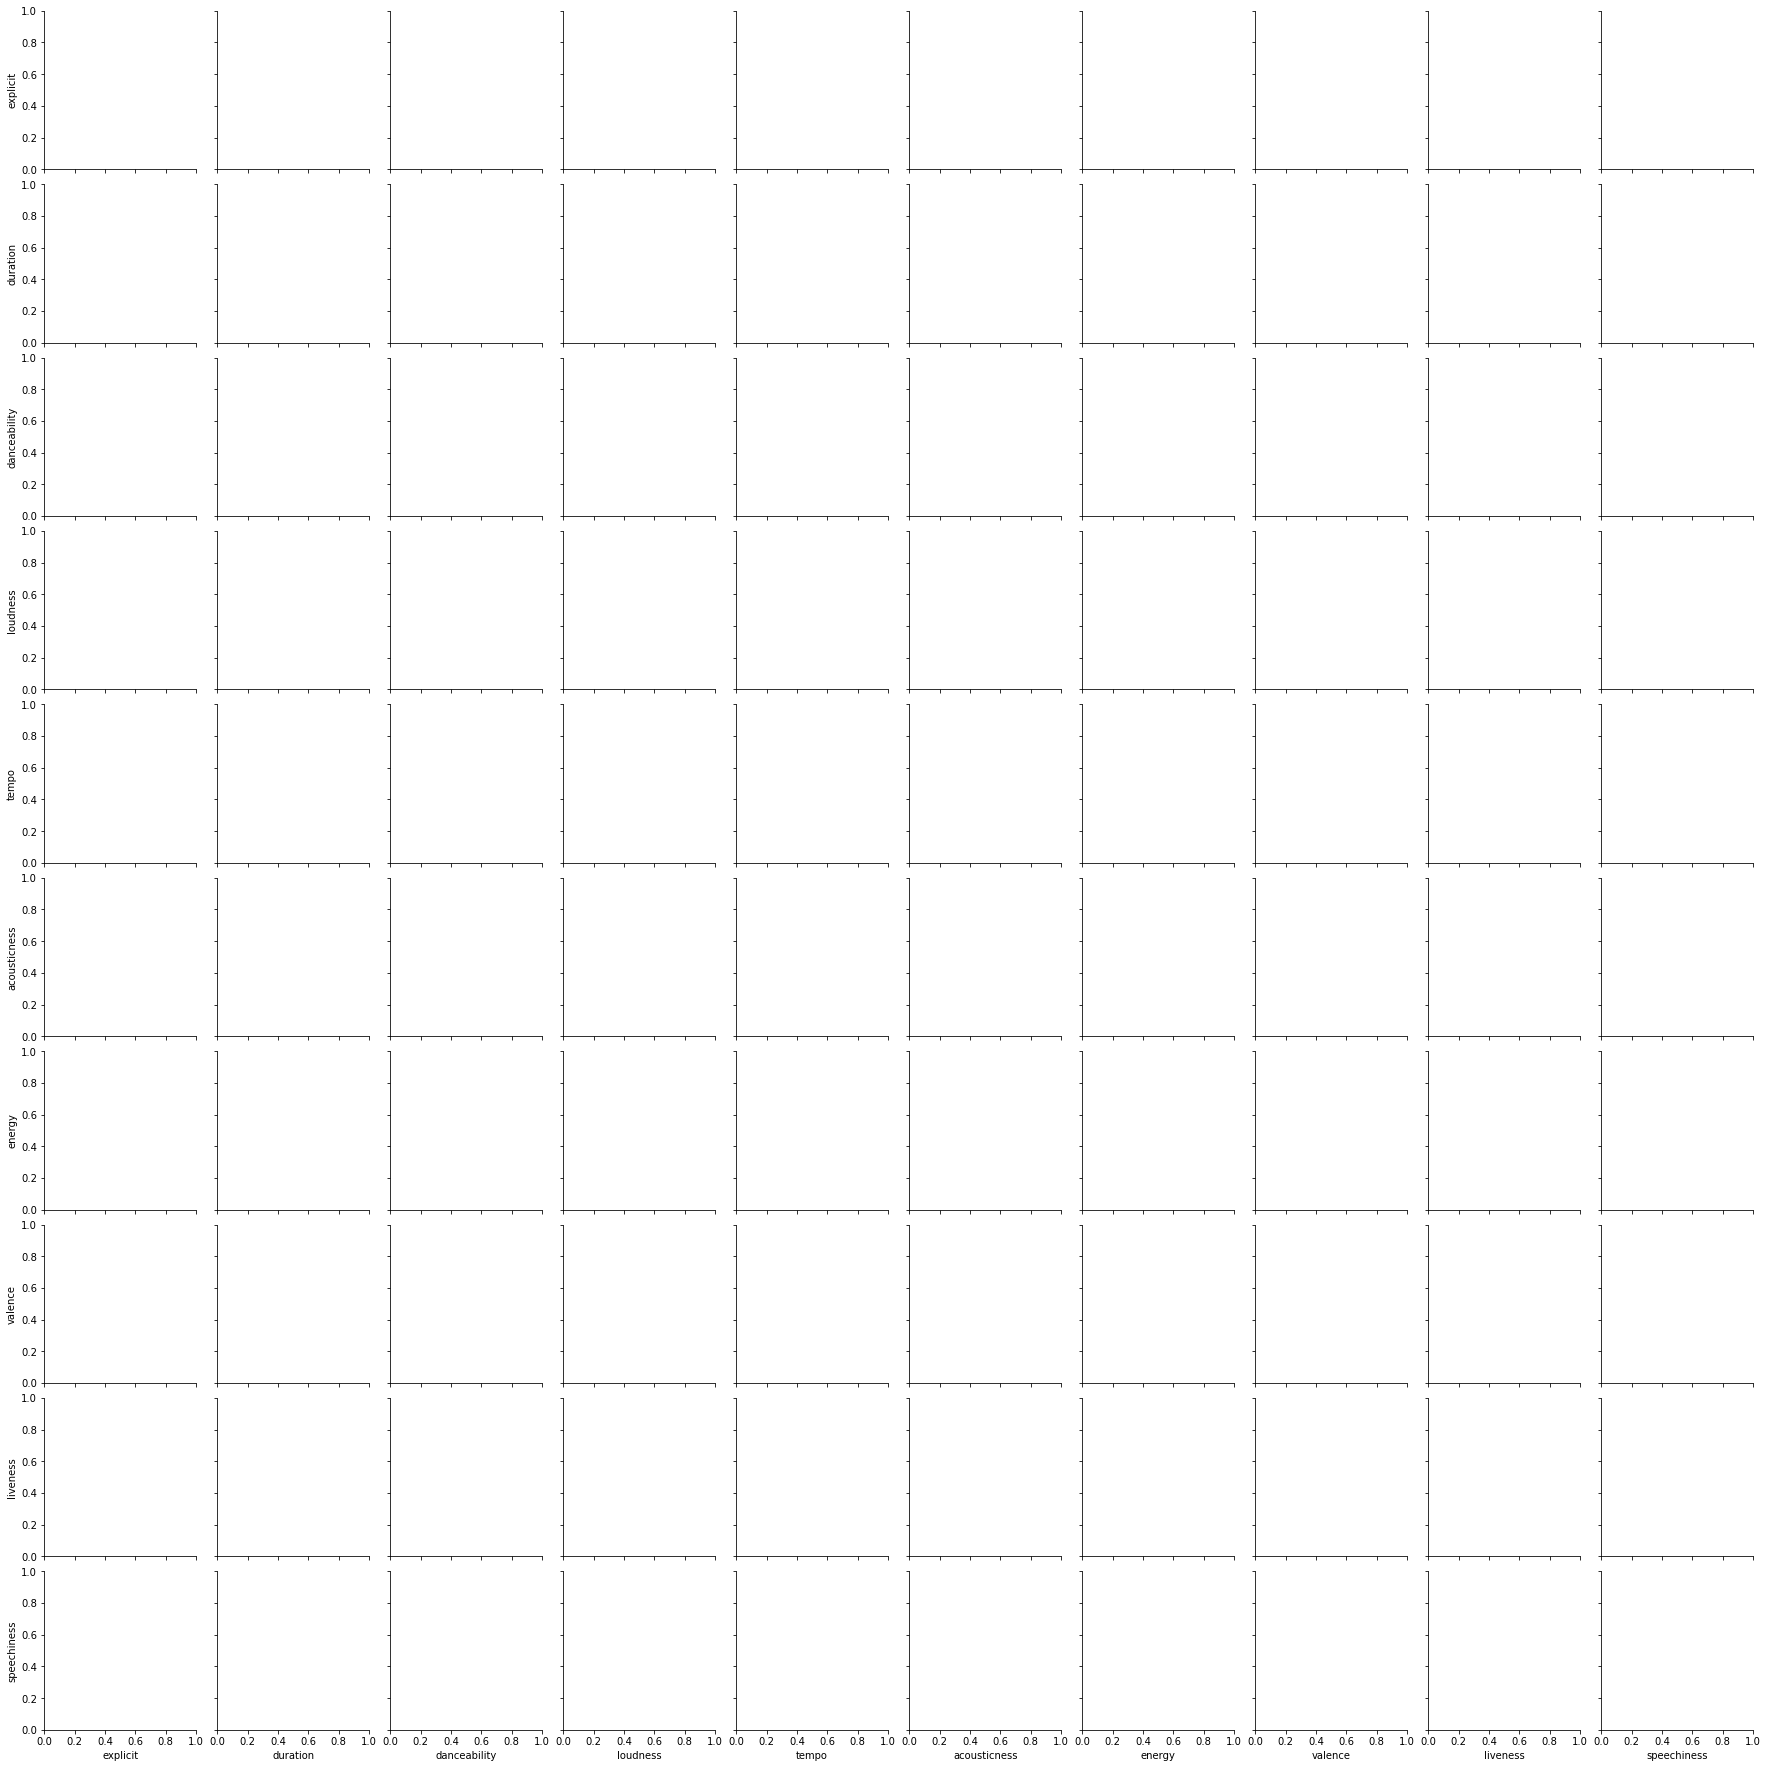

In [5]:
## doing a pairplot to see if there's a noticiable difference in their music
music_pairplot = sns.pairplot(df_songs, hue='username')
music_pairplot